# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import os
import gmaps
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 26.891,
        "lat": -33.5906
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75,
        "feels_like": 80.15,
        "temp_min": 75,
        "temp_max": 75,
        "pressure": 1015,
        "humidity": 80
    },
    "visibility": 10000,
    "wind": {
        "speed": 3,
        "deg": 290,
        "gust": 8.01
    },
    "clouds": {
        "all": 12
    },
    "dt": 1614950856,
    "sys": {
        "type": 3,
        "id": 2011314,
        "country": "ZA",
        "sunrise": 1614917043,
        "sunset": 1614962647
    },
    "timezone": 7200,
    "id": 964432,
    "name": "Port Alfred",
    "cod": 200
}


In [28]:
print(requests.get(query_url + city))

<Response [200]>


In [29]:
# Create list for info response 
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting at 1
retrieving_record = 1

# Print Starting Log Statement
print(f"Start Data Retrieval")
print(f"------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Retrieving Record {retrieving_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        retrieving_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print ending log retrieval confirmation
print(f"------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------")

Start Data Retrieval
------------------------
Retrieving Record 1 | Cidreira
Retrieving Record 2 | Eilat
Retrieving Record 3 | Maţāy
Retrieving Record 4 | Cabo San Lucas
Retrieving Record 5 | Saskylakh
Retrieving Record 6 | Kruisfontein
Retrieving Record 7 | Novominskaya
Retrieving Record 8 | Punta Arenas
Retrieving Record 9 | Ola
Retrieving Record 10 | Mandera
Retrieving Record 11 | Clyde River
Retrieving Record 12 | Albany
Retrieving Record 13 | Bluff
Retrieving Record 14 | Smithers
Retrieving Record 15 | Mataura
Retrieving Record 16 | Puerto Ayora
Retrieving Record 17 | Kavieng
Retrieving Record 18 | Avarua
Retrieving Record 19 | Umba
City not found. Skipping...
City not found. Skipping...
Retrieving Record 20 | Ulladulla
Retrieving Record 21 | Verkhoyansk
Retrieving Record 22 | Rūdbār
Retrieving Record 23 | Butaritari
Retrieving Record 24 | Rikitea
Retrieving Record 25 | Abu Samrah
Retrieving Record 26 | Atuona
Retrieving Record 27 | Soller
Retrieving Record 28 | Upernavik
Retrievi

Retrieving Record 230 | Soyo
Retrieving Record 231 | Chicama
Retrieving Record 232 | Longyearbyen
Retrieving Record 233 | Haines Junction
Retrieving Record 234 | Iqaluit
City not found. Skipping...
Retrieving Record 235 | Margate
Retrieving Record 236 | Petrykivka
Retrieving Record 237 | College
City not found. Skipping...
Retrieving Record 238 | San Matías
Retrieving Record 239 | Kerema
City not found. Skipping...
Retrieving Record 240 | Timmins
Retrieving Record 241 | Thinadhoo
Retrieving Record 242 | Hofn
Retrieving Record 243 | Grand-Santi
Retrieving Record 244 | Mogwase
Retrieving Record 245 | Chenzhou
Retrieving Record 246 | Tabas
Retrieving Record 247 | Matagami
City not found. Skipping...
Retrieving Record 248 | Cruzília
Retrieving Record 249 | Santa Josefa
Retrieving Record 250 | Buraidah
Retrieving Record 251 | Ghanzi
Retrieving Record 252 | Flinders
Retrieving Record 253 | Bathsheba
Retrieving Record 254 | Fukuechō
Retrieving Record 255 | Ayacucho
Retrieving Record 256 | Por

Retrieving Record 464 | Mongaguá
Retrieving Record 465 | Port Lincoln
Retrieving Record 466 | Kautokeino
Retrieving Record 467 | Grand Bend
Retrieving Record 468 | Tunceli
City not found. Skipping...
City not found. Skipping...
Retrieving Record 469 | Leticia
Retrieving Record 470 | Utinga
Retrieving Record 471 | Matucana
Retrieving Record 472 | Naze
Retrieving Record 473 | Havøysund
City not found. Skipping...
City not found. Skipping...
Retrieving Record 474 | Sola
Retrieving Record 475 | Blythe
Retrieving Record 476 | Petropavlovsk-Kamchatskiy
Retrieving Record 477 | Cabedelo
Retrieving Record 478 | Salina
Retrieving Record 479 | Geraldton
Retrieving Record 480 | Pisz
Retrieving Record 481 | Lom Sak
City not found. Skipping...
Retrieving Record 482 | Bonthe
Retrieving Record 483 | Drovyanaya
Retrieving Record 484 | San Rafael
Retrieving Record 485 | Half Moon Bay
Retrieving Record 486 | Dudinka
Retrieving Record 487 | Baghdad
Retrieving Record 488 | San Cristobal
Retrieving Record 4

## Convert Raw Data to DataFrame
* Save as csv

In [30]:
# Create DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness, and Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               554
Country            554
Date               554
Latitude           554
Longitude          554
Max Temperature    554
Humidity           554
Cloudiness         554
Wind Speed         554
dtype: int64

In [31]:
# Display DataFrame
weather_data.head()


,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,1614950872,-30.1811,-50.2056,75.97,80,90,14.05
1,Eilat,IL,1614950852,29.5581,34.9482,73.40,33,0,12.66
2,Maţāy,EG,1614950872,28.4190,30.7792,75.27,18,0,12.95
3,Cabo San Lucas,MX,1614950873,22.8909,-109.9124,63.00,88,75,3.44
4,Saskylakh,RU,1614950873,71.9167,114.0833,-30.39,95,0,8.10


In [32]:
# Export and save data as a csv file
weather_data.to_csv("Output/weather_data.csv")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

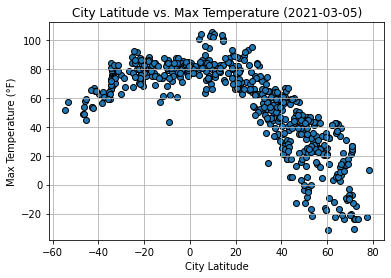

In [33]:
# Create Scatter Plot for City Latitude vs. Max Temperature 
# plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

from datetime import datetime

plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save plotted figure as a .png
plt.savefig("Output/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

In the scatter plot for City Latitude vs. Maximum Temperature above, as cities are closer to the equator (where latitude is 0 degrees), the higher the maximum temperature. 

### Latitude vs. Humidity Plot

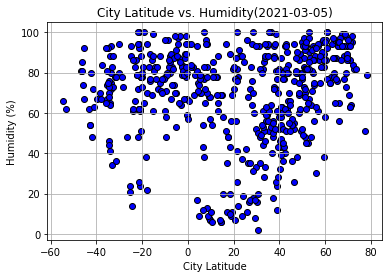

In [34]:
# Create Scatter Plot for City Latitude vs. Humidity

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="blue", marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Humidity({datetime.now().date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save plotted figure as a .png
plt.savefig("Output/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

In the scatter plot for City Latitude vs. Humidity above, there is no strong correlation that can be seen. The data does show that cities that are in the Northern Hemisphere (latitude >0 degree) tend to have a stronger cluster of higher humidity percentages as it nears the North Pole. 

### Latitude vs. Cloudiness Plot

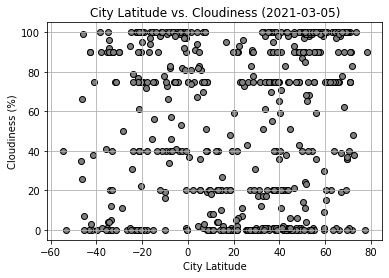

In [35]:
# Create Scatter Plot for City Latitude vs. Cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="grey", marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)


# Save plotted figure as a .png
plt.savefig("Output/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

In the scatter plot for City Latitude vs. Cloudiness above, there is no strong correlation that can be seen. The data does show scattered clusters of higher cloudiness percentages at the top right and bottom right, as well as top left, without being able to draw strong conclusions.

### Latitude vs. Wind Speed Plot

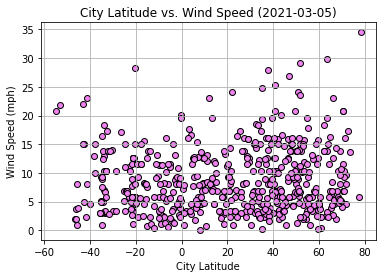

In [36]:
# Create Scatter Plot for City Latitude vs. Wind Speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="violet", marker="o", edgecolor="black")

plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.grid(True)

# Save plotted figure as a .png
plt.savefig("Output/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

In the scatter plot for City Latitude vs. Wind Speed above, there is no strong correlation that can be seen. 
The data does show clusters of higher wind speed (mph) at the bottom of the chart across the spectrum of city latitudes without being able to draw strong conclusions. The majority of the wind speeds overall appear to 15mph or less. One oulier at >40mph is visible at around 70 degrees latitude closer to teh North Pole. 

## Linear Regression

### Write linear regression plot function (optional)

In [37]:
northern_hemisphere = weather_data.loc[weather_data["Latitude"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Latitude"] < 0]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

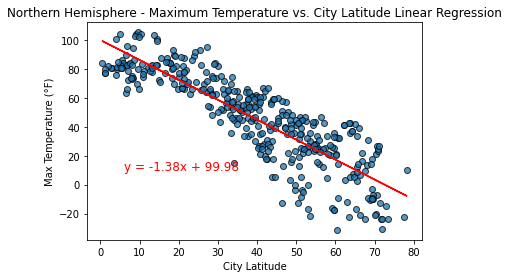

The r-value for the Northern Hemisphere: City Latitude vs. Maximum Temperature plot is -0.8596486459044691


In [38]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=12, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Maximum Temperature vs. City Latitude Linear Regression")
plt.savefig("Output2/northern_hemi_max_temp_linear_regression.png")
plt.show()

print(f"The r-value for the Northern Hemisphere: City Latitude vs. Maximum Temperature plot is {rvalue}")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

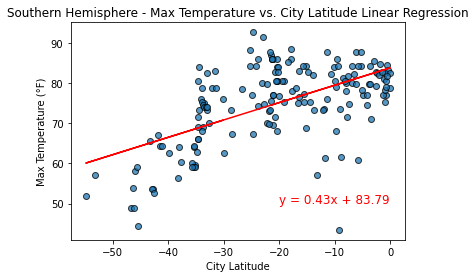

The r-value for the Southern Hemisphere: City Latitude vs. Maximum Temperature plot is 0.5880352125220554


In [39]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 50), fontsize=12, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere - Max Temperature vs. City Latitude Linear Regression")
plt.savefig("Output2/southern_hemi_max_temp_linear_regresssion.png")
plt.show()

print(f"The r-value for the Southern Hemisphere: City Latitude vs. Maximum Temperature plot is {rvalue}")


In reviewing the pair of scatter plots above for Maximum Temperature for a closer Hemisphere analysis:

There appears to be a negative correlation between City Latitude vs. Max Temeperature in the Northern Hemisphere.

There appears to be a positive correlation between City Latitude vs. Max Temeperature in the Southern Hemisphere.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

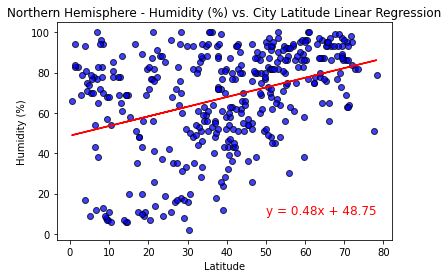

The r-value for the Northern Hemisphere: City Latitude vs. Humidity plot is 0.3720261376946705


In [40]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="blue", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50, 10), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. City Latitude Linear Regression")
plt.savefig("Output2/northern_hemi_humidity_linear_regression.png")
plt.show()

print(f"The r-value for the Northern Hemisphere: City Latitude vs. Humidity plot is {rvalue}")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

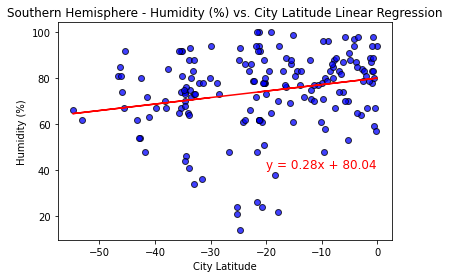

The r-value for the Southern Hemisphere: City Latitude vs. Humidity plot is 0.22545196153510558


In [41]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="blue", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 41), fontsize=12, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. City Latitude Linear Regression")
plt.savefig("Output2/southern_hemi_humidity_linear_regression.png")
plt.show()

print(f"The r-value for the Southern Hemisphere: City Latitude vs. Humidity plot is {rvalue}")

In reviewing the pair of scatter plots above for Humidity for a closer Hemisphere analysis:

There appears to be a positive correlation between City Latitude vs. Humidity in the Northern Hemisphere, with higher humidity percentage values at higher latitude values. However the r value indicates the relationship is not a strong one. 

There appears to be a positive correlation between City Latitude vs. Humidity in the Southern Hemisphere also, with an even weaker relationship between the 2 variables than found in the Northern Hemisphere. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

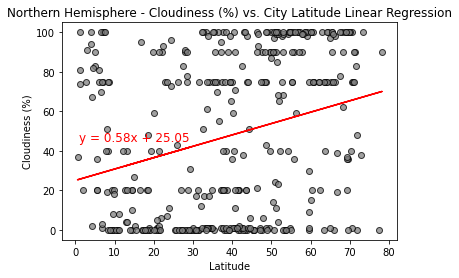

The r-value for the Northern Hemisphere: City Latitude vs. Cloudiness plot is 0.27767365604578803


In [42]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="grey", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1, 45), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. City Latitude Linear Regression")
plt.savefig("Output2/northern_hemi__cloudiness_linear_regression.png")
plt.show()

print(f"The r-value for the Northern Hemisphere: City Latitude vs. Cloudiness plot is {rvalue}")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

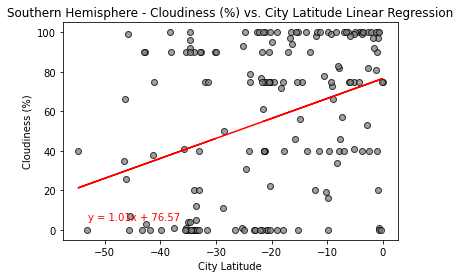

The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is 0.35298062081405096


In [43]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="grey", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,5), fontsize=10, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. City Latitude Linear Regression")
plt.savefig("Output2/southern_hemi__cloudiness_linear_regression.png")
plt.show()

print(f"The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is {rvalue}")

In reviewing the pair of scatter plots above for Cloudiness for a closer Hemisphere analysis:

There appears to be a positive correlation between City Latitude vs. Cloudinessin the Northern Hemisphere, however the r value indicates the relationship is not a strong one. 

There appears to be a positive correlation between City Latitude vs. Cloudiness in the Southern Hemisphere also, with a slightly stronger relationship between the 2 variables than found in the Northern Hemisphere. 

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

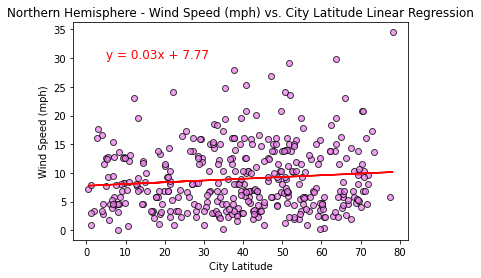

The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is 0.10317685022900512


In [44]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="violet", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 30), fontsize=12, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. City Latitude Linear Regression")
plt.savefig("Output2/northern_hemi_wind_linear_regression.png")
plt.show()

print(f"The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is {rvalue}")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

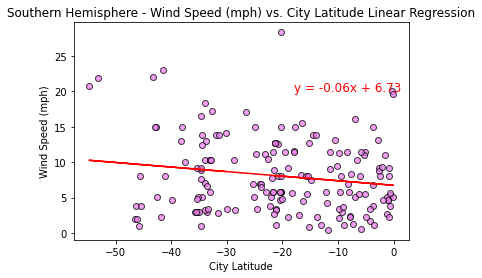

The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is -0.1677919662778812


In [45]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, facecolors="violet", marker = "o", edgecolor = "black", alpha = .75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18, 20), fontsize=12, color="red")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. City Latitude Linear Regression")
plt.savefig("Output2/southern_hemi_wind_linear_regression.png")
plt.show()


print(f"The r-value for the Southern Hemisphere: City Latitude vs. Cloudiness plot is {rvalue}")

In reviewing the pair of scatter plots above for Wind Speed for a closer Hemisphere analysis:

There appears to be a flat line or no real correlation between City Latitude vs. Wind Speed in the Northern Hemisphere, supported by a very low r value. 

There appears to be a negative correlation between City Latitude vs. Wind Speed in the Southern Hemisphere, with a relatively weak correlation between the 2 variables, as indicated by its r value. 